In [2]:
from sympy import MatrixSymbol, Matrix, Identity

import sympy as sym
import pandas as pd
import math

sym.init_printing()
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import control
import random

# IDENTIFICACIÓN DE SISTEMAS

Profesor: Jairo Alberto Cuéllar Guarnizo  
Programa: Ingeniería en Automatización y Control

## Ejemplo 1

Dada una señal de entrada y salida, obtenga el modelo estimado usando el modelo ARMAX.

In [13]:
## Sistema de segundo orden en tiempo continuo
g = control.tf([20],[1,3,10,20])
dt = 0.2
t = np.linspace(0,25,1+int(25/dt))

# Señal de salida ideal "y"
_,y = control.step_response(g,t)
N = len(t)
u = np.ones(N)
## Ruido para simular la señal de salida capturada "yn"
r = 0.01
e = np.random.normal(0,1,size=N)
yn = y+e*r

gd = control.c2d(g,dt)
print(gd)

#a = np.asarray([t,yn])
#a = a.transpose()
#np.savetxt('data\clase_09.csv', a, delimiter=",")

data = {'t':t,'yn':yn,'un':u}

df = pd.DataFrame(data)
df.to_csv('data\clase_09.csv',index = False)


0.02264 z^2 + 0.07694 z + 0.01679
----------------------------------
z^3 - 2.194 z^2 + 1.859 z - 0.5488

dt = 0.2



In [14]:
gd.pole()

array([0.7848905 +0.51313036j, 0.7848905 -0.51313036j,
       0.62410641+0.j        ])

,t,yn,un
0,0.0,0.001347,1.0
1,0.2,0.021550,1.0
2,0.4,0.155157,1.0
3,0.6,0.404081,1.0
4,0.8,0.740278,1.0
...,...,...,...
121,24.2,1.001431,1.0
122,24.4,0.987689,1.0
123,24.6,0.997372,1.0
124,24.8,0.996352,1.0


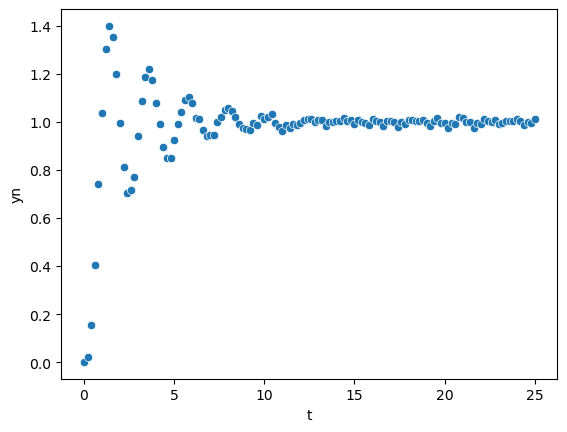

In [15]:
datos = pd.read_csv ('data\clase_09.csv')

sns.scatterplot(datos,x ='t',y = 'yn' )
datos